In [158]:
import numpy as np

# Sample Average - Epsilon greedy

In [165]:
action_reward_std = 2 #Standard deviation of reward distribution
n_actions = 10
action_reward_means = [0, -1, 1.5, 0.5, -1.5, 0, -1, 1 , -0.75, 1.25] #Defines mean of reward distribution per action
reward_per_action_log = [[] for i in range(n_actions)] #Stores reward for each action
all_reward_log = [] #Stores all rewards, useful to track average reward per step

def sample_reward(action, num_samples=1):
    reward = np.random.normal(action_reward_means[action], action_reward_std, num_samples)[0]
    reward_per_action_log[action].append(reward)
    all_reward_log.append(reward)
    return reward

In [166]:
Q = np.zeros(n_actions)
action_space = [i for i in range(n_actions)]

def greedy_action_selection():
    a = np.argmax(Q)
    # Check if there are others actions with max value
    if Q[Q == Q[a]].size > 1:
        action_options = np.argwhere(Q == Q[a]).reshape(-1)
        action = np.random.choice(action_options)
        sample_reward(action)
    else:
        sample_reward(a)

def update_q_values():
    idx = 0
    for action_reward_log in reward_per_action_log:
        if len(action_reward_log) > 0:
            Q[idx] = np.mean(np.array(action_reward_log))
        idx += 1

In [167]:
average_reward_per_step = []
num_steps = 2000

def run(epsilon):
    #Reset all logs
    global average_reward_per_step, all_reward_log, Q, reward_per_action_log
    average_reward_per_step = []
    all_reward_log = []
    Q = np.zeros(n_actions)
    reward_per_action_log = [[] for i in range(n_actions)]
    
    for i in range(num_steps):
        eps_value = np.random.random()
        if eps_value > epsilon:
            greedy_action_selection() #Exploit
        else:
            action = np.random.choice(action_space) #Explore
            sample_reward(action)

        #Todo: Running average is much more efficient
        avg = np.mean(np.array(all_reward_log))
        average_reward_per_step.append(avg)
        update_q_values()
    return average_reward_per_step

epsilon_001 = run(0.01)
epsilon_0 = run(0)
epsilon_01 = run(0.1)


2000


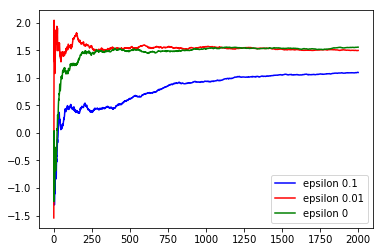

In [168]:
import matplotlib.pyplot as plt
print(len(epsilon_1))
plt.plot(range(num_steps), epsilon_01, 'b', label='epsilon 0.1')
plt.plot(range(num_steps), epsilon_001, 'r', label='epsilon 0.01')
plt.plot(range(num_steps), epsilon_0, 'g', label='epsilon 0')
plt.legend()
plt.show()

In [169]:
Q

array([-0.22757564, -1.04036879,  1.06568389,  0.62807366, -1.39386556,
       -0.24200665, -0.7909253 ,  0.75365803, -0.31644018,  1.36507138])

In [162]:
np.argmax(Q)

2